# Lid-driven flow example

The following example is based on a lid-driven cavity flow, as developed by Mohamad ("Lattice Boltzmann Method: Fundamentals and Engineering Applications with Computer Codes', 2011).

We first import the libraries and dependencies:

In [2]:
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from scipy.interpolate import griddata

import planet_LB as p_LB

M2S = p_LB.Myr2s
Y2S = M2S/1e6
pLB = p_LB.planet_LB()


Next we develop the geometry of the problem. The following illustrates the general setup from Mohamad (2011):

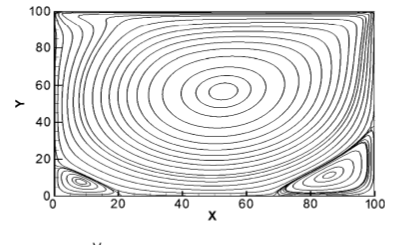

A square cavity of 1 m side is filled with a fluid with viscosity of 0.01 Pa.s (Re=1000). The lid is set to motion with a speed of 0.1 m/s. Note, Mohamad describes a problem with an equivalent Re in his text, but with slightly different length/viscosity scales. The following parameters follow his presented code instead, and we benchmark against that. 

In [12]:
#Geometry

uo=0.10
rhoo=5.0

m=100
n=100

dist_x = 1.0
dist_y = 1.0
# Backing out increments
dx = dist_x/n
dy= dist_y/m

alpha=0.01 
H=0
mstep=40000

dt=1.0

lb_s = pLB.LB_D2Q9_init_Lid(dt,m,n,dx,dy,rhoo,uo,H,alpha,mstep)

In [18]:
for t in range(mstep):
    rho, vx, vy, f =  pLB.LB_D2Q9_V(lb_s)
    lb_s['f']=f
    lb_s['vx']=vx
    lb_s['vy']=vy
    lb_s['rho']=rho
    if t % 100 == 0:
        # Uncomment the following line to observe progress
        #print("%d: %s" % (t,","))



# Visualisation

And next we visualise the results.

1.0 1.0 1.0 1.0 1.0 1.0


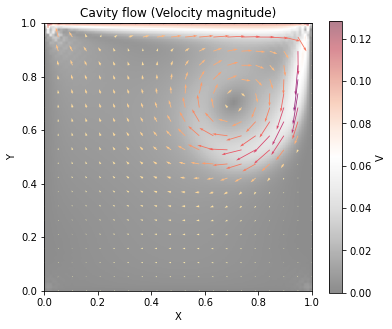

In [15]:
plt.figure(figsize=(6,5))
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Cavity flow (Velocity magnitude)")
vmagH =np.sqrt(vx*vx + vy*vy)

# Initiatialise grid
x = np.arange(0,dx*(n+1),dx)
y = np.arange(0,dy*(m+1),dy)
#print(y)
X,Y = np.meshgrid(x,y) # Change rows to columns
X=X.T
Y=Y.T

plt.imshow(vmagH.T, extent=[0, n*dx, 0, m*dy], origin='lower', cmap='RdGy_r', alpha=0.5)
#plt.colorbar();
cbar=plt.colorbar(label='V');

# The following plots the quivers at lower resolution

XL,YL = np.meshgrid(np.linspace(0,1,20),np.linspace(0,1,20))
vxL = griddata((X.ravel(),Y.ravel()), vx.ravel(), (XL.ravel(),YL.ravel()), method='cubic')
vyL = griddata((X.ravel(),Y.ravel()), vy.ravel(), (XL.ravel(),YL.ravel()), method='cubic')
vxL = vxL.reshape(XL.shape)
vyL = vyL.reshape(XL.shape)
vmag =np.sqrt(vxL*vxL + vyL*vyL)


q1 = plt.quiver(XL, YL, vxL, vyL,vmag, alpha=1.,cmap = 'magma_r')



# Benchmarking

If the above code is run for the full 40,000 timesteps, it attains a state that looks like this:


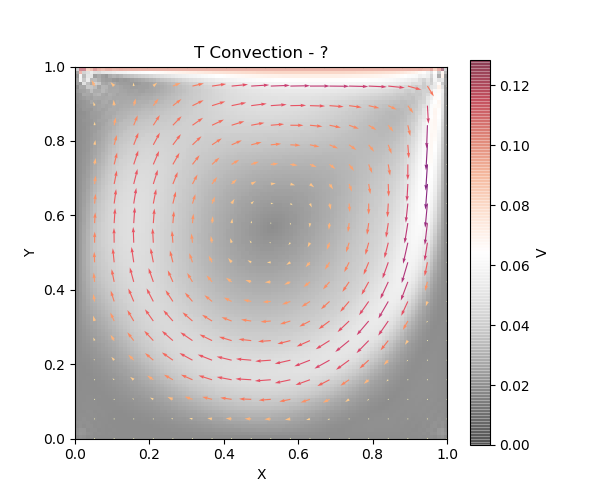

For this example, the centre line velocity at X=0.5 can be extracted, and compared to the finite-volume benchmark (and Lattice Boltzmann benchmarks) of Mohamad. The results are shown below.

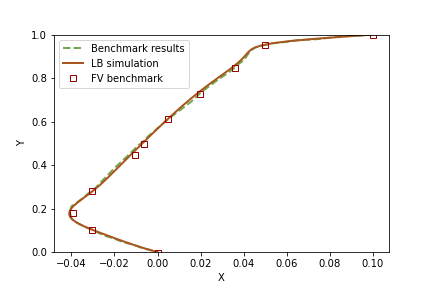

The benchmark finite-volume data and LB data from Mohamad (2011) can be downloaded from the github site (files entitled Benchmark_lid_LB_Mohammed.csv and Benchmark_lid_FVM.dat). For completeness, this data is listed below:

FV benchmark:

1,0.99756
0.49887, 0.95
0.35892, 0.84791
0.19865, 0.72634
0.0474, 0.61208
-0.06095, 0.49771
-0.10384, 0.44659
-0.30248, 0.28123
-0.39503, 0.18145
-0.30248, 0.10074
1.11022e-16,-0.00244

LB benchmark (Mohamad 2011):
1.00451,0.99999
0.93905,0.99527
0.8465,0.99062
0.74041,0.97868
0.65011,0.97402
0.58239,0.96443
0.53047,0.95968
0.48307,0.9476
0.45372,0.94036
0.43567,0.92821
0.41986,0.90873
0.40181,0.88195
0.37698,0.86493
0.35666,0.84547
0.32731,0.82359
0.28442,0.79443
0.23702,0.7604
0.19865,0.73122
0.16704,0.69959
0.1219,0.66556
0.07675,0.63152
0.04966,0.61207
0.00226,0.57073
-0.04063,0.53425
-0.06772,0.50748
-0.09707,0.48316
-0.12641,0.45397
-0.15801,0.42478
-0.18962,0.39558
-0.21896,0.36639
-0.26411,0.32016
-0.28668,0.29582
-0.30474,0.28123
-0.3228,0.26908
-0.34086,0.25205
-0.36117,0.23747
-0.38149,0.22288
-0.39955,0.21073
-0.40406,0.19611
-0.40632,0.18148
-0.40181,0.15708
-0.386,0.13997
-0.36117,0.12771
-0.33183,0.113
-0.30474,0.10318
-0.2754,0.08848
-0.24153,0.07376
-0.2009,0.06147
-0.15801,0.04429
-0.11287,0.03442
-0.06998,0.01724
-0.03612,0.00984
-0.00451,1e-05
